In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [2]:
from feature_engine.discretisation import EqualFrequencyDiscretiser


In [3]:
from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.target, columns=['target'])
df.head()

/workspace/data-analytics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


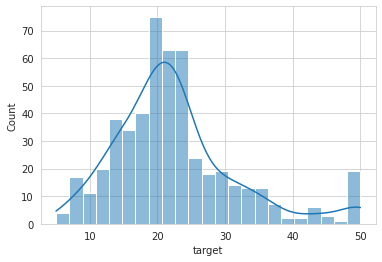

In [4]:
#assess the plot
sns.histplot(data=df, x='target', kde=True)
plt.show()

In [5]:
# create pipeline with equal frequency discretizer
pipeline = Pipeline([
      ('efd', EqualFrequencyDiscretiser(q=5, variables=['target'] ))
])

df_transformed = pipeline.fit_transform(df)


In [6]:
pipeline['efd'].binner_dict_

{'target': [-inf, 15.3, 19.7, 22.700000000000006, 28.2, inf]}

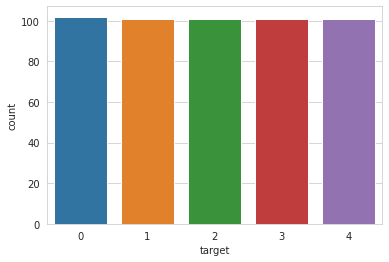

In [7]:
sns.countplot(data=df_transformed, x='target')
plt.show()

In [8]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [9]:
from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.target, columns=['target'])
df.head()

/workspace/data-analytics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


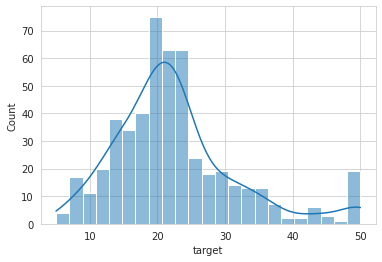

In [10]:
sns.histplot(data=df, x='target', kde=True)
plt.show()

In [11]:
pipeline = Pipeline([
      ('ewd', EqualWidthDiscretiser(bins=6, variables=['target']) )
])

df_transformed = pipeline.fit_transform(df)

In [12]:
pipeline['ewd'].binner_dict_

{'target': [-inf, 12.5, 20.0, 27.5, 35.0, 42.5, inf]}

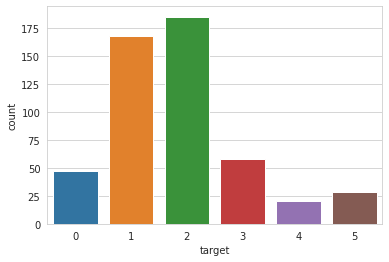

In [13]:
sns.countplot(data=df_transformed, x='target')
plt.show()

In [14]:
from feature_engine.discretisation import ArbitraryDiscretiser

In [15]:
from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.target, columns=['target'])
df.head()

/workspace/data-analytics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


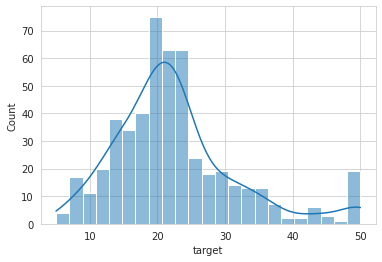

In [16]:
sns.histplot(data=df, x='target', kde=True)
plt.show()

In [17]:
import numpy as np # we import NumPy to set -inf and +inf
pipeline = Pipeline([
      ( 'arbd', ArbitraryDiscretiser(binning_dict={'target':[-np.inf,10,20,40,np.inf]}) )
])

df_transformed = pipeline.fit_transform(df)

In [18]:
pipeline['arbd'].binner_dict_

{'target': [-inf, 10, 20, 40, inf]}

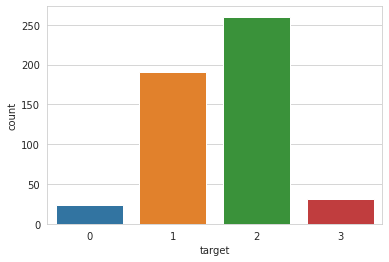

In [19]:
sns.countplot(data=df_transformed, x='target')
plt.show()